## Relevant Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import yfinance as yf

## Data Loading

In [2]:
btc = yf.Ticker('BTC-USD')
prices1 = btc.history(period='5y')
prices1.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

eth = yf.Ticker('ETH-USD')
prices2 = eth.history(period='5y')
prices2.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

usdt = yf.Ticker('USDT-USD')
prices3 = usdt.history(period='5y')
prices3.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

bnb = yf.Ticker('BNB-USD')
prices4 = bnb.history(period='5y')
prices4.drop(columns=['Open', 'High', 'Low', 'Dividends', 'Stock Splits'], axis = 1, inplace = True)

In [3]:
p1 = prices1.join(prices2, lsuffix = ' (BTC)', rsuffix = ' (ETH)')
p2 = prices3.join(prices4, lsuffix = ' (USDT)', rsuffix = ' (BNB)')
data = p1.join(p2, lsuffix = '_', rsuffix = '_')

In [4]:
data

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
Date,,,,,,,,
2019-05-11 00:00:00+00:00,7204.771484,28867562329,194.304337,12578331654,1.000759,26823706394,21.049442,298063616
2019-05-12 00:00:00+00:00,6972.371582,27773333680,187.325317,10326050090,0.995634,26115401657,20.830297,239206084
2019-05-13 00:00:00+00:00,7814.915039,28677672181,196.846283,10367149039,1.005109,24593762690,23.811028,404049210
2019-05-14 00:00:00+00:00,7994.416016,32031452227,217.148575,12751049755,1.000001,31171158466,23.626419,328207185
2019-05-15 00:00:00+00:00,8205.167969,28344112920,247.153061,13460006534,1.002776,27509475185,26.894939,357899657
...,...,...,...,...,...,...,...,...
2024-05-07 00:00:00+00:00,62334.816406,25930730982,3006.577148,11743187337,1.000000,46143834059,577.486206,1535678414
2024-05-08 00:00:00+00:00,61187.941406,26088172222,2973.657227,11791662158,0.999585,46623837988,588.197449,1603241013
2024-05-09 00:00:00+00:00,63049.960938,25453338161,3036.020508,10861947179,0.999868,46236991775,596.031982,1897318659


## Data Understanding and Preprocessing

In [5]:
data.describe()

,Close (BTC),Volume (BTC),Close (ETH),Volume (ETH),Close (USDT),Volume (USDT),Close (BNB),Volume (BNB)
count,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03,1828.000000,1.828000e+03
mean,28383.178584,3.072685e+10,1614.646942,1.507765e+10,1.000823,5.158611e+10,233.640105,1.207369e+09
std,17277.126654,1.785654e+10,1184.703840,9.790864e+09,0.002682,3.346017e+10,180.135828,1.409634e+09
min,4970.788086,5.331173e+09,110.605873,2.081626e+09,0.974248,9.989859e+09,9.386050,1.061036e+08
25%,11042.986328,1.900253e+10,348.647217,8.119036e+09,1.000011,2.692869e+10,28.395957,3.582163e+08
50%,26456.622070,2.706711e+10,1635.732666,1.275137e+10,1.000280,4.412533e+10,254.632362,6.645921e+08
75%,41513.508789,3.776437e+10,2344.577026,1.892777e+10,1.000952,6.534524e+10,332.692772,1.611801e+09
max,73083.500000,3.509679e+11,4812.087402,8.448291e+10,1.053585,2.790675e+11,675.684082,1.798295e+10


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2019-05-11 00:00:00+00:00 to 2024-05-11 00:00:00+00:00
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Close (BTC)    1828 non-null   float64
 1   Volume (BTC)   1828 non-null   int64  
 2   Close (ETH)    1828 non-null   float64
 3   Volume (ETH)   1828 non-null   int64  
 4   Close (USDT)   1828 non-null   float64
 5   Volume (USDT)  1828 non-null   int64  
 6   Close (BNB)    1828 non-null   float64
 7   Volume (BNB)   1828 non-null   int64  
dtypes: float64(4), int64(4)
memory usage: 193.1 KB


In [7]:
data.dtypes

Close (BTC)      float64
Volume (BTC)       int64
Close (ETH)      float64
Volume (ETH)       int64
Close (USDT)     float64
Volume (USDT)      int64
Close (BNB)      float64
Volume (BNB)       int64
dtype: object

In [8]:
data.shape

(1828, 8)

In [9]:
data.isnull().sum()

Close (BTC)      0
Volume (BTC)     0
Close (ETH)      0
Volume (ETH)     0
Close (USDT)     0
Volume (USDT)    0
Close (BNB)      0
Volume (BNB)     0
dtype: int64

In [10]:
data.corr()['Volume (BNB)']

Close (BTC)      0.632814
Volume (BTC)     0.532981
Close (ETH)      0.544085
Volume (ETH)     0.646896
Close (USDT)    -0.116761
Volume (USDT)    0.747320
Close (BNB)      0.577617
Volume (BNB)     1.000000
Name: Volume (BNB), dtype: float64

In [11]:
data.columns

Index(['Close (BTC)', 'Volume (BTC)', 'Close (ETH)', 'Volume (ETH)',
       'Close (USDT)', 'Volume (USDT)', 'Close (BNB)', 'Volume (BNB)'],
      dtype='object')

## Checking Multicollinearity using Variance Inflation Factor

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data[['Close (BTC)', 
                  'Volume (BTC)',
#                   'Close (ETH)',
                  'Volume (ETH)',
                  'Close (USDT)',
#                   'Volume (USDT)',
                  'Close (BNB)',
                  'Volume (BNB)']]

vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif['Features'] = variables.columns
vif

,VIF,Features
0,4.647983,Close (BTC)
1,3.113574,Volume (BTC)
2,3.588641,Volume (ETH)
3,6.493039,Close (USDT)
4,4.493138,Close (BNB)
5,2.553116,Volume (BNB)


In [13]:
data.drop(['Close (ETH)',  'Volume (USDT)'], axis = 1, inplace = True)

In [14]:
data.tail()

,Close (BTC),Volume (BTC),Volume (ETH),Close (USDT),Close (BNB),Volume (BNB)
Date,,,,,,
2024-05-07 00:00:00+00:00,62334.816406,25930730982,11743187337,1.000000,577.486206,1535678414
2024-05-08 00:00:00+00:00,61187.941406,26088172222,11791662158,0.999585,588.197449,1603241013
2024-05-09 00:00:00+00:00,63049.960938,25453338161,10861947179,0.999868,596.031982,1897318659
2024-05-10 00:00:00+00:00,60792.777344,27804954694,12278653601,0.999861,585.622192,1521708160
2024-05-11 00:00:00+00:00,61088.847656,15379411968,7338917888,0.999638,593.984680,1352779264


## Correlation Heatmap

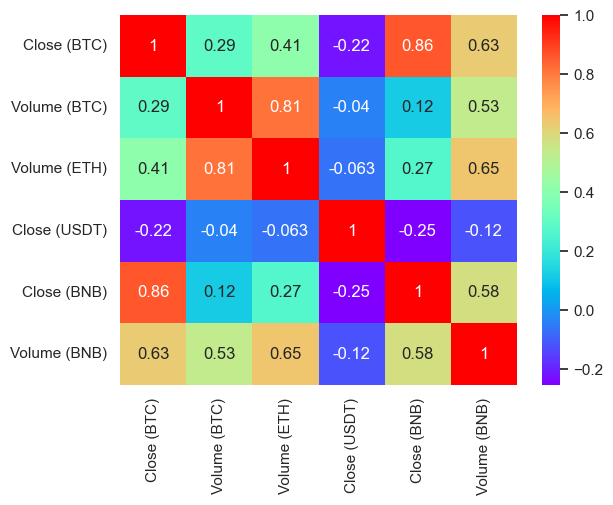

In [15]:
sns.heatmap(data.corr(), annot = True, cmap = 'rainbow')
plt.show()

## Outliers Checking

In [16]:
data.columns

Index(['Close (BTC)', 'Volume (BTC)', 'Volume (ETH)', 'Close (USDT)',
       'Close (BNB)', 'Volume (BNB)'],
      dtype='object')

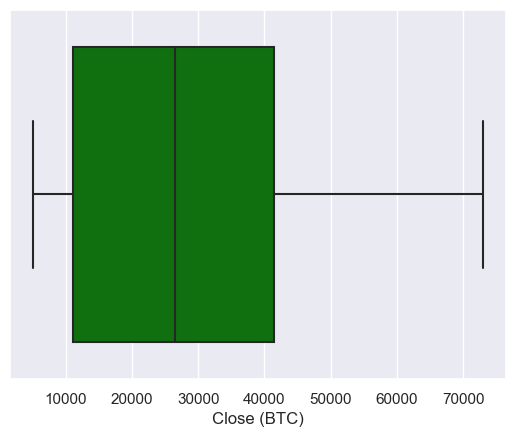

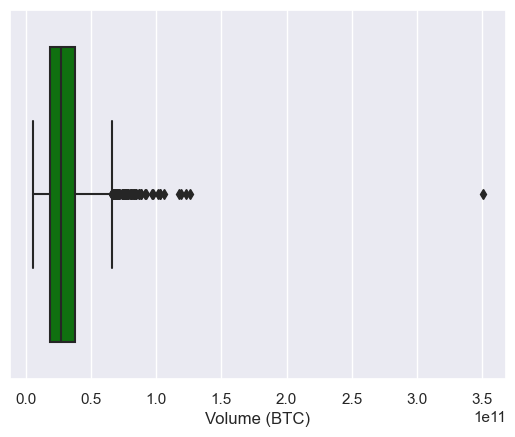

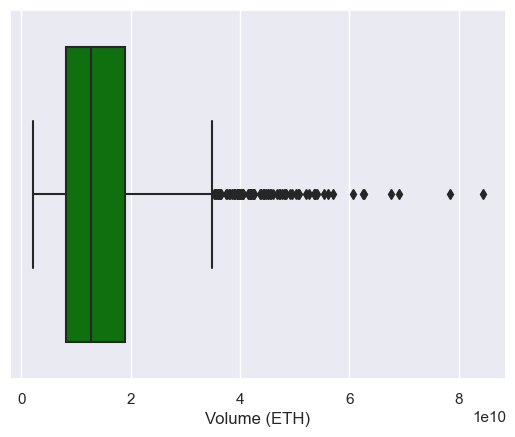

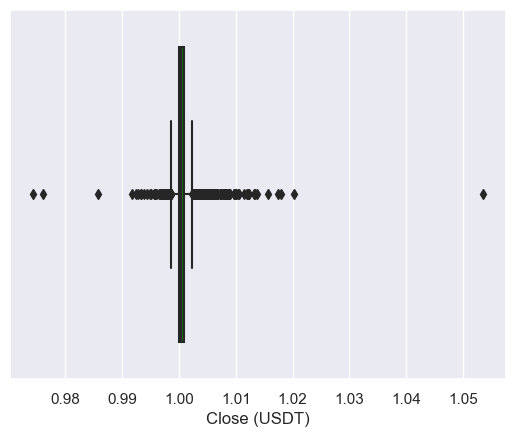

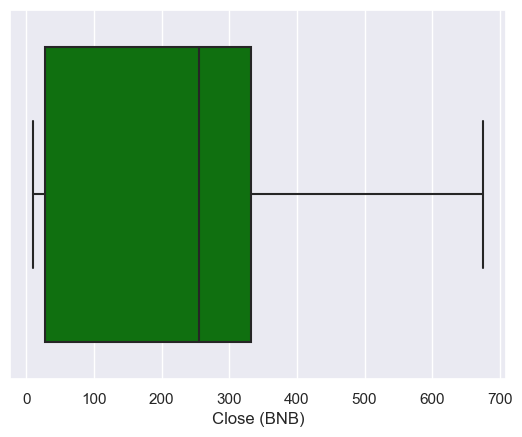

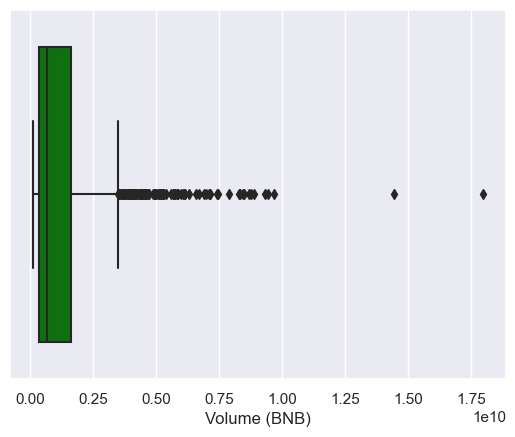

In [17]:
for i in data.columns:
    sns.boxplot(data = data, x = data[i], color = 'green')
    plt.show()

In [18]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
IQR=q3-q1
Lower=q1-1.5*IQR
Upper=q3+1.5*IQR

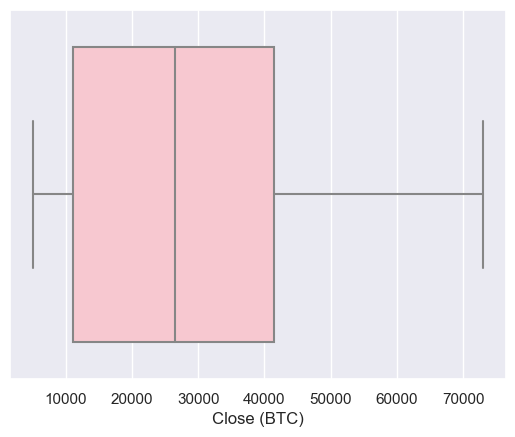

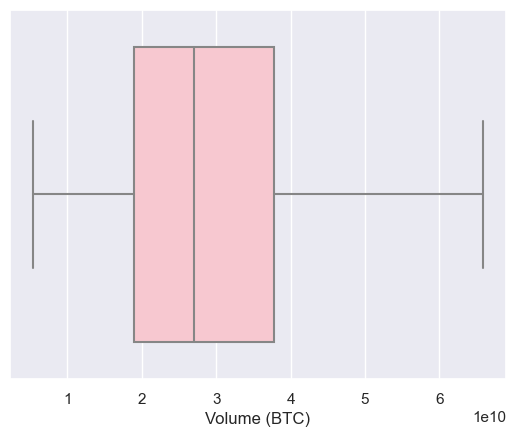

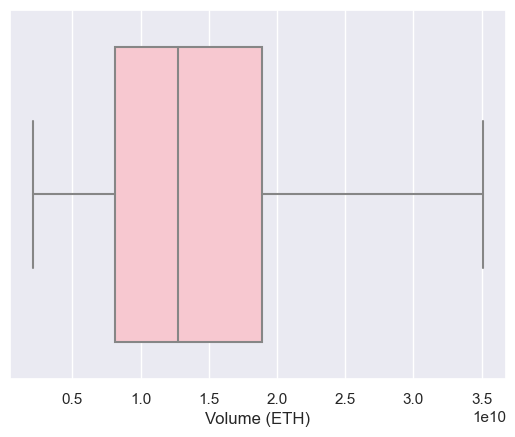

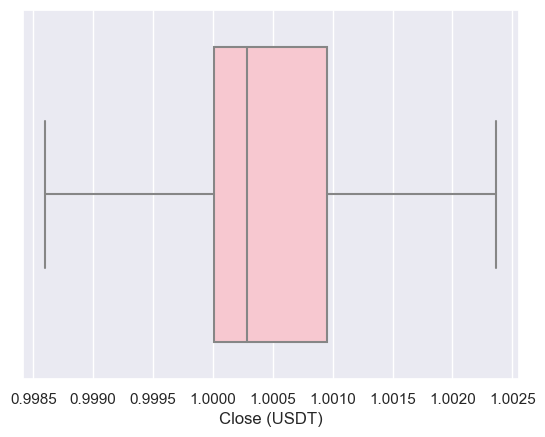

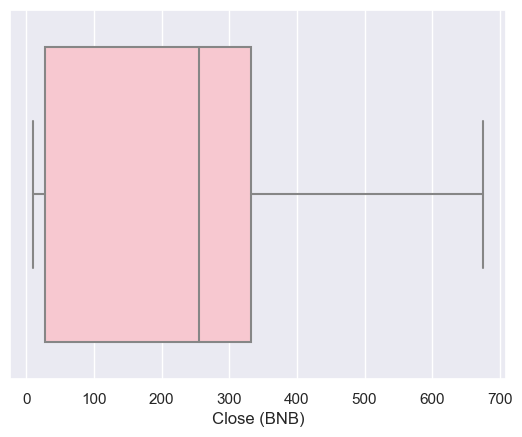

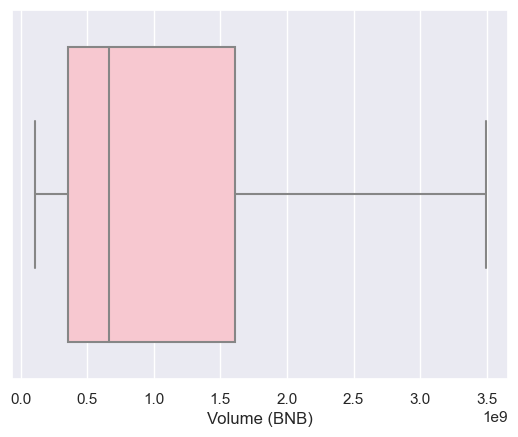

In [19]:
for i in data.columns:
    
    data[i] = np.where(data[i] > Upper[i], Upper[i],data[i])
    data[i] = np.where(data[i] < Lower[i], Lower[i],data[i])
    
    sns.boxplot(data = data, x = data[i], color = 'pink')
    plt.show()

In [20]:
data = data.reset_index(drop = True)

In [21]:
data.describe()

,Close (BTC),Volume (BTC),Volume (ETH),Close (USDT),Close (BNB),Volume (BNB)
count,1828.000000,1.828000e+03,1.828000e+03,1828.000000,1828.000000,1.828000e+03
mean,28383.178584,3.001433e+10,1.460097e+10,1.000512,233.640105,1.088951e+09
std,17277.126654,1.442895e+10,8.213498e+09,0.001010,180.135828,9.667778e+08
min,4970.788086,5.331173e+09,2.081626e+09,0.998598,9.386050,1.061036e+08
25%,11042.986328,1.900253e+10,8.119036e+09,1.000011,28.395957,3.582163e+08
50%,26456.622070,2.706711e+10,1.275137e+10,1.000280,254.632362,6.645921e+08
75%,41513.508789,3.776437e+10,1.892777e+10,1.000952,332.692772,1.611801e+09
max,73083.500000,6.590713e+10,3.514088e+10,1.002365,675.684082,3.492179e+09


## Visualizing Data Distribution

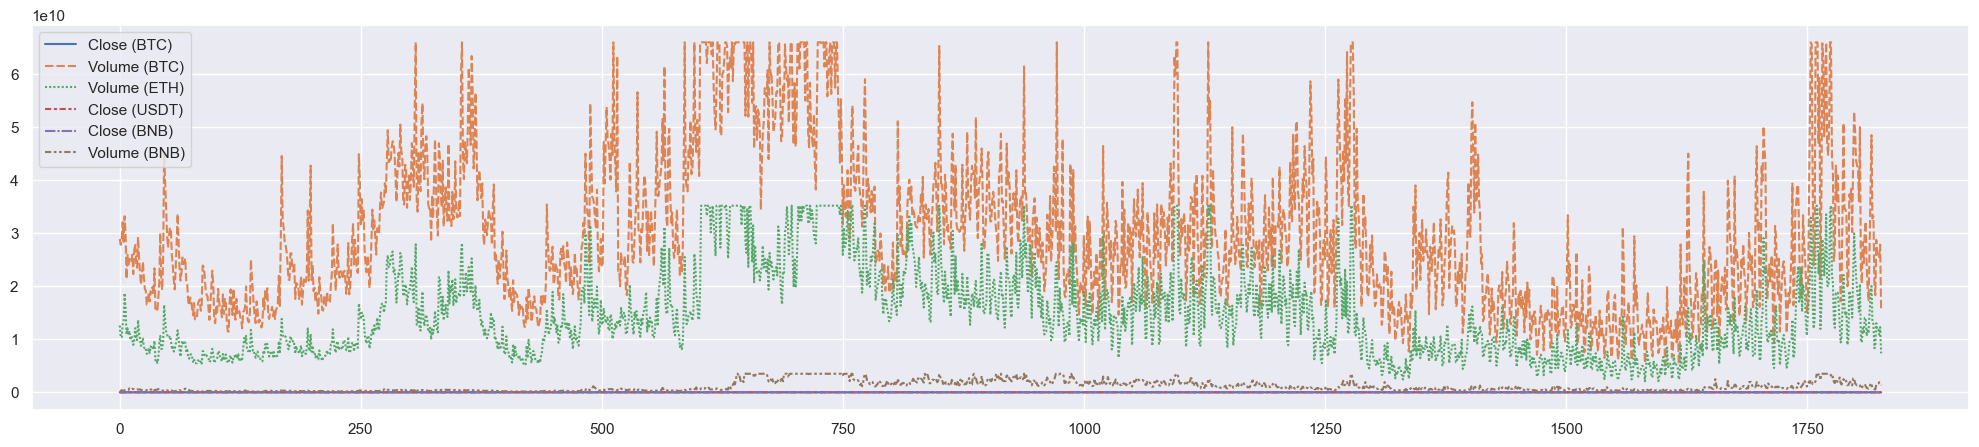

In [22]:
plt.figure(figsize = (25, 5))
sns.lineplot(data = data)
plt.show()

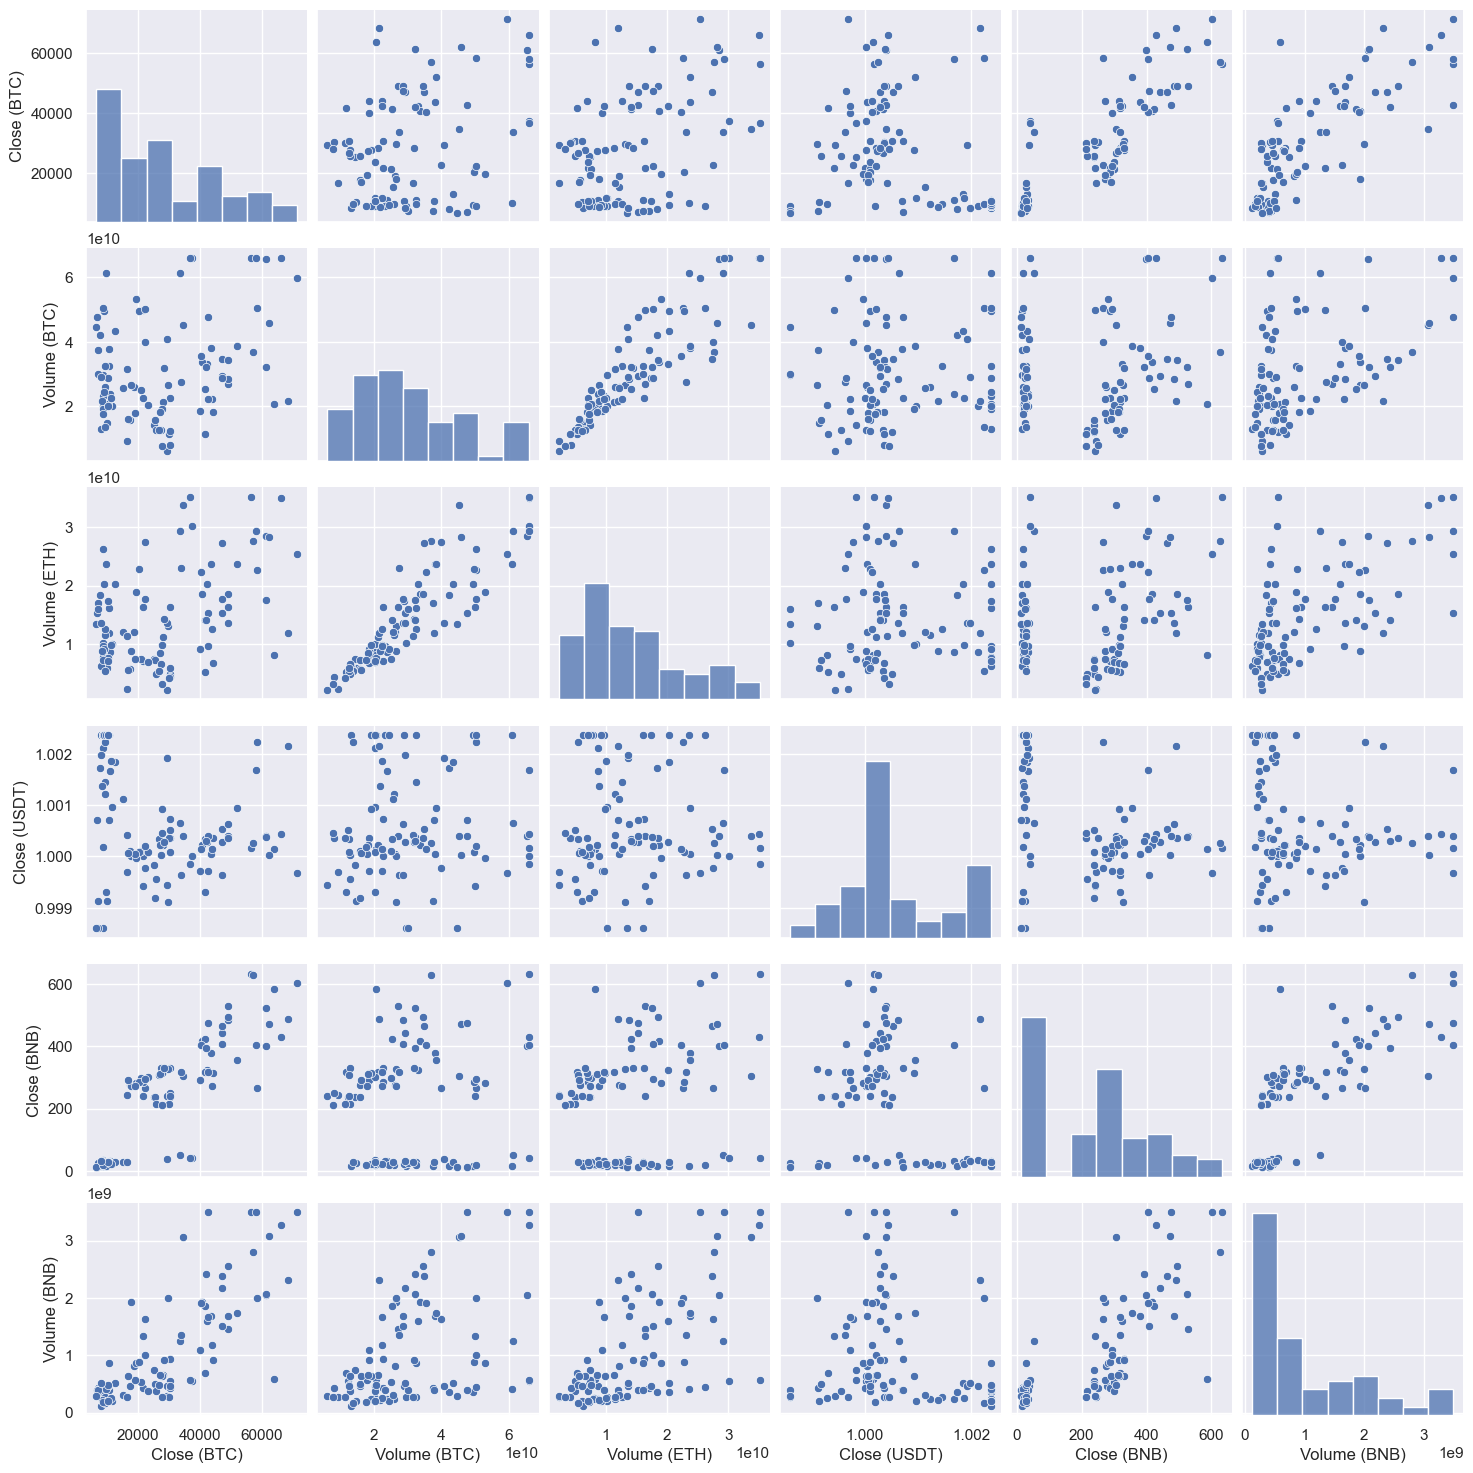

In [23]:
sns.pairplot(data.sample(n=100))
plt.show()

## Splitting Data into Train and Test Phase

In [24]:
X = data.drop('Close (BTC)', axis = 1)
y = data['Close (BTC)']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Model Evaluation Function

In [36]:
def evaluate(model, X_test, y_test):
    
    pd.options.display.float_format = '{:.4f}'.format
    y_pred_test=model.predict(X_test)
    mae_test=metrics.mean_absolute_error(y_test, y_pred_test)
    mse_test=metrics.mean_squared_error(y_test, y_pred_test)
    rmse_test=np.sqrt(mse_test)
    r2_test=metrics.r2_score(y_test, y_pred_test)
    
    
    y_pred_train=model.predict(X_train)
    mae_train=metrics.mean_absolute_error(y_train, y_pred_train)
    mse_train=metrics.mean_squared_error(y_train, y_pred_train)
    rmse_train=np.sqrt(mse_train)
    r2_train=metrics.r2_score(y_train, y_pred_train)
    
    
    results_dict = {
        'Metric': ['MAE', 'MSE', 'RMSE', 'R2'],
        'Train': [mae_train, mse_train, rmse_train, r2_train*100],
        'Test': [mae_test, mse_test, rmse_test, r2_test*100]
    }

    results_df = pd.DataFrame(results_dict)
    
    print(results_df)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rfr_base = RandomForestRegressor(n_estimators = 100, random_state = 42)

In [39]:
rfr_base.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
result_rfr_base = evaluate(rfr_base, X_test, y_test)

  Metric        Train          Test
0    MAE    1135.2125     3205.0597
1    MSE 3629528.7535 27184559.2615
2   RMSE    1905.1322     5213.8814
3     R2      98.7801       90.9571


## Hyperparameter Tuning

In [44]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 200, num = 20)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520, 530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780, 790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910, 920, 930, 940, 950, 960, 970, 980, 990, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [46]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 200, cv = 3, verbose=0, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
228 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
109 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\ASUS\anaconda3\Lib\site-packages\sk

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=200,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110, 120,
                                                      130, 140, 150, 160, 170,
                                                      180, 190, 200, None],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 180, 190,
                                                         200, 210, 220, 230,
                                                         240, 250, 260, 270,
                                                         280, 290, 300, ...]},
                   random_state=42)

In [47]:
rf_random.best_params_

{'n_estimators': 600,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 70,
 'bootstrap': True}

In [48]:
optimized_rfr_model=rf_random.best_estimator_
result_optimized_rfr_model=evaluate(optimized_rfr_model, X_test, y_test)

  Metric        Train          Test
0    MAE    1175.5185     3285.3775
1    MSE 3461400.5208 25778255.7201
2   RMSE    1860.4839     5077.2291
3     R2      98.8366       91.4249


## Univariate Analysis

In [49]:
variables = []
train_r2_scores = []
test_r2_scores = []

for i in X_train.columns: 
    X_train_single = X_train[[i]]
    X_test_single = X_test[[i]]

    
    optimized_rfr_model.fit(X_train_single, y_train)
    
    
    y_pred_train_single = optimized_rfr_model.predict(X_train_single)
    train_r2 = metrics.r2_score(y_train, y_pred_train_single)
    
    

    y_pred_test_single = optimized_rfr_model.predict(X_test_single)
    test_r2 = metrics.r2_score(y_test, y_pred_test_single)

    variables.append(i)
    train_r2_scores.append(train_r2)
    test_r2_scores.append(test_r2)
    
    
    
results_df = pd.DataFrame({'Variable': variables, 'Train R2': train_r2_scores, 'Test R2': test_r2_scores})

results_df_sorted = results_df.sort_values(by='Test R2', ascending=False)

pd.options.display.float_format = '{:.4f}'.format

results_df_sorted

,Variable,Train R2,Test R2
3,Close (BNB),0.9662,0.7607
4,Volume (BNB),0.9139,0.4865
2,Close (USDT),0.7495,-0.0013
1,Volume (ETH),0.8217,-0.0981
0,Volume (BTC),0.8000,-0.2775
